<a href="https://colab.research.google.com/github/Shrey-Viradiya/ML_DL/blob/master/Pneumonia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Classification Using Keras

In [1]:
!nvidia-smi

Thu Jun 18 21:33:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Upload your kaggle token (i.e. kaggle.json) and then run it.

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:47<00:00, 61.3MB/s]
100% 2.29G/2.29G [00:47<00:00, 51.7MB/s]


In [4]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [5]:
!rm -r chest_xray/chest_xray/ -f
!rm -r chest_xray/__MACOSX/ -f

### Dataset available at: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

Importing Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [7]:
train_directory = 'chest_xray/train/'
test_directory = 'chest_xray/test/'
valid_directory = 'chest_xray/val/'

## Exploring data

Let's plot some random images
-----------------------------


Text(0.5, 1.0, 'person132_virus_266.jpeg')

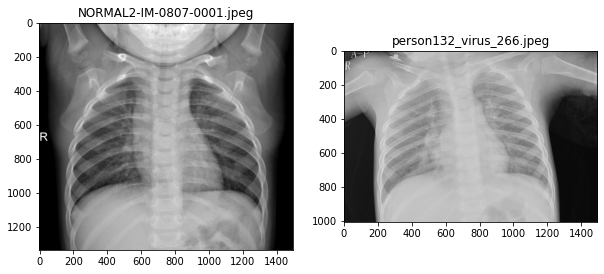

In [8]:
import os
from PIL import Image

print("Let's plot some random images")
print("-----------------------------")

images = os.listdir(train_directory+'NORMAL')
name1 = images[np.random.randint(0,len(images))]
path1 = train_directory + "NORMAL/" + name1

images = os.listdir(train_directory+'PNEUMONIA')
name2 = images[np.random.randint(0,len(images))]
path2 = train_directory + "PNEUMONIA/" + name2

plt.figure(figsize= (10,6))

plt.subplot(121)
plt.imshow(Image.open(path1), cmap='gray')
plt.title(name1)

plt.subplot(122)
plt.imshow(Image.open(path2), cmap='gray')
plt.title(name2)

## Creating ImageDataGenerators

In [9]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [10]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [11]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
valid_generator = valid_datagen.flow_from_directory(
    valid_directory,
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


### Creating Model

In [12]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters = 64, kernel_size = 7, input_shape=[300,300,3]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=1, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 256)       5

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_generator, validation_data = valid_generator, epochs= 15)

Epoch 1/15
39/41 [===========================>..] - ETA: 7s - loss: 3.9384 - accuracy: 0.7417 

KeyboardInterrupt: ignored